# <font size='10' color='#1ABC9C'> Model Creation </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
## When using the 'inline' backend, 
## your matplotlib graphs will be included in your notebook, next to the code.
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
import itertools
import time
pd.pandas.set_option('display.max_columns',None)

In [2]:
X_train=pd.read_csv('X_train.csv')
X_test= pd.read_csv('X_test.csv')
X_test_No_Drop=pd.read_csv('X_test_no_drop.csv')
X_train_No_Drop = pd.read_csv('X_train_no_drop.csv')

Y_train=pd.read_csv('Y_train.csv')
Y_test= pd.read_csv('Y_test.csv')

##What's the shape of data set
print(X_train.shape , X_test.shape)
Y_train.head()


(2924, 5) (1204, 5)


,income
0,0.493023
1,0.673929
2,0.298995
3,0.110763
4,0.451989


In [3]:
print(Y_train.head , Y_test.head)

<bound method NDFrame.head of         income
0     0.493023
1     0.673929
2     0.298995
3     0.110763
4     0.451989
...        ...
2919  0.738478
2920  0.790897
2921  0.298995
2922  0.261057
2923  0.545686

[2924 rows x 1 columns]> <bound method NDFrame.head of         income
0     0.840627
1     0.555475
2     0.630596
3     0.245850
4     0.652353
...        ...
1199  0.888739
1200  0.652353
1201  0.245850
1202  0.599231
1203  0.505323

[1204 rows x 1 columns]>


In [4]:
X_train.columns

Index(['yrsed', 'creddebt', 'othdebt', 'carvalue', 'jobsat'], dtype='object')

## Some pre checks on the selected features

#### Normality of Selected Continuous Features

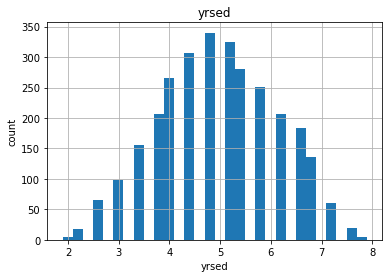

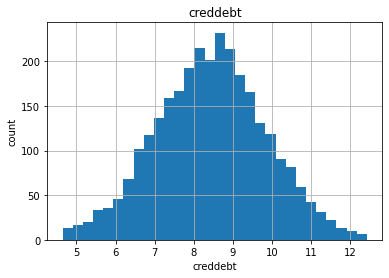

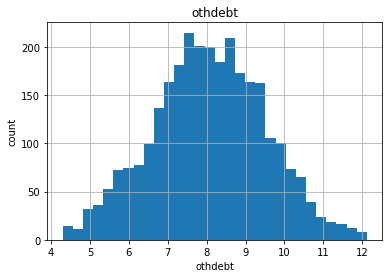

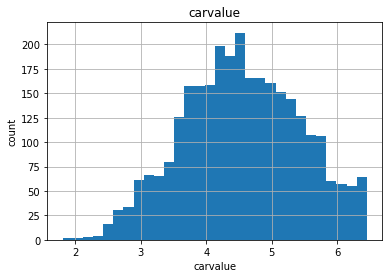

In [5]:
list_conti_features = [feature for feature in X_train.columns if 'jobsat' not in feature]

for feature in list_conti_features:
    X_train[feature].hist(bins=30)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()## dont use it to have all in one plot, it looks colorful
    

#### correlation betweem income and selected feature 

In [6]:
list_of_all_features = X_train.columns

for feature in list_of_all_features:
    correlation  = X_train[feature].corr(Y_train['income'])
    print( 'income',' & ', feature , " = " , correlation)
        


income  &  yrsed  =  0.2060996728787874
income  &  creddebt  =  0.5719262291248887
income  &  othdebt  =  0.6597597406748216
income  &  carvalue  =  0.9582546203782575
income  &  jobsat  =  0.25550374169413564


#### correlation between selected features 


In [7]:
for i in range (0,len(list_of_all_features)):
    for j in range (i+1 , len(list_of_all_features)):
        correlation  = X_train[list_of_all_features[i]].corr(X_train[list_of_all_features[j]])
        if (correlation>=0.5):
            print( list_of_all_features[i],' & ', list_of_all_features[j] , " = " , correlation)
        


creddebt  &  othdebt  =  0.6553549382826677
creddebt  &  carvalue  =  0.5427275572814454
othdebt  &  carvalue  =  0.6278832080324844


#### multicollinearity in Independent features

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] =X_train[list_of_all_features].columns
  
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train[list_of_all_features].values, i)
                          for i in range(len(X_train[list_of_all_features].columns))]
  
print(vif_data)

    feature        VIF
0     yrsed  16.449844
1  creddebt  59.976301
2   othdebt  67.399633
3  carvalue  48.462950
4    jobsat   5.915424


### Observations from above pre-modeling tests.
we can assume to drop yrsed as it has highest multi-collinearity and is least significant for predicting 
the income.

Also we can also think of droping creddebt as its also least significant in predicting the income.



# Finally Creating the Models
1. SKlearn model is used to model accuracy on the test data

2. Statsmodel is used get the summary of the model produced.

*Both the models are same 

##  Model 1  - All selected features considered



In [9]:
model_1 = linear_model.LinearRegression()
model_1.fit(X_train,Y_train)



LinearRegression()

Doing the prediction

In [10]:
Y_prediction = model_1.predict(X_test)
Y_prediction

# predicting the accuracy score
score=r2_score(Y_test,Y_prediction)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(Y_test,Y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(Y_test,Y_prediction)))

r2 score is  -0.19308091240738823
mean_sqrd_error is== 0.08203263772959749
root_mean_squared error of is== 0.286413403543894


#### Moldel 1 Rejected as R2 is negative


## Model 2 - Removing least co-related feature with income i.e. yrsed



In [11]:
# 'creddebt', 'othdebt', 'carvalue', 'jobsat'
trainData = pd.concat([Y_train,X_train],axis=1)
formula = 'income~creddebt+othdebt+carvalue+jobsat'
model_2  = smf.ols(formula,trainData).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     8972.
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:48:56   Log-Likelihood:                 3730.9
No. Observations:                2924   AIC:                            -7452.
Df Residuals:                    2919   BIC:                            -7422.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7617      0.008    -91.583      0.0

In [12]:
prediction = model_2.predict(X_test)
score=r2_score(Y_test,prediction)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(Y_test,prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(Y_test,prediction)))

r2 score is  -0.21057511240772886
mean_sqrd_error is== 0.08323548604950008
root_mean_squared error of is== 0.28850560835016725


#### Moldel 2 Rejected as R2 is negative

## Model 3 - Removing 2nd least co-related feature with income i.e. creddebt

In [13]:
trainData = pd.concat([Y_train,X_train],axis=1)
formula = 'income~othdebt+carvalue+jobsat'
model_3  = smf.ols(formula,trainData).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.182e+04
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:48:56   Log-Likelihood:                 3714.5
No. Observations:                2924   AIC:                            -7421.
Df Residuals:                    2920   BIC:                            -7397.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7423      0.008    -97.161      0.0

In [14]:
prediction = model_3.predict(X_test)
score=r2_score(Y_test,prediction)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(Y_test,prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(Y_test,prediction)))

r2 score is  -0.09493877294564146
mean_sqrd_error is== 0.07528468083183089
root_mean_squared error of is== 0.2743805401843048


#### Moldel 3 Rejected as R2 is negative

## since three models are already rejected , we'll apply Algorithms to find best model 

## Algorithm 1 - Best Subset Model

In [15]:
def fit_linear_reg(X,Y,x_test):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    list_of_features = [feature for feature in X.columns]
    x_test = x_test[list_of_features].copy()
        
  # print(Y.shape,Y_test.Shape)
    RSS = mean_squared_error(Y_test,model_k.predict(x_test)) * len(Y_test)
    R_squared = model_k.score(x_test,Y_test)
    return RSS, R_squared

In [16]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
Y = Y_train.copy()
X = X_train.copy()
k = 11
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tempX = X_test.copy()
        tmp_result = fit_linear_reg(X[list(combo)],Y,tempX)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})


C:\Users\offic\AppData\Local\Temp/ipykernel_12612/3439191930.py:12: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


Loop...:   0%|          | 0/5 [00:00<?, ?it/s]

In [17]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(3))
display(df_max.head(3))

,numb_features,RSS,R_squared,features
2,1,69.488695,0.160596,"(othdebt,)"
9,2,42.715138,0.484013,"(creddebt, othdebt)"
22,3,41.714691,0.496098,"(creddebt, othdebt, jobsat)"


,numb_features,RSS,R_squared,features
2,1,69.488695,0.160596,"(othdebt,)"
9,2,42.715138,0.484013,"(creddebt, othdebt)"
22,3,41.714691,0.496098,"(creddebt, othdebt, jobsat)"


In [18]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
for i in range (0,len(df)):
    if df['R_squared'][i]> 0.4:
        print(i , " >>> " ,df['R_squared'][i]," - ",df['features'][i]) 


9  >>>  0.4840132558888085  -  ('creddebt', 'othdebt')
15  >>>  0.4905965289360269  -  ('yrsed', 'creddebt', 'othdebt')
22  >>>  0.4960983693545291  -  ('creddebt', 'othdebt', 'jobsat')
26  >>>  0.5050741451515242  -  ('yrsed', 'creddebt', 'othdebt', 'jobsat')


### creating model with No_Drops

In [19]:
def fit_linear_reg(X,Y,x_test):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    list_of_features = [feature for feature in X.columns]
    x_test = x_test[list_of_features].copy()
        
  # print(Y.shape,Y_test.Shape)
    RSS = mean_squared_error(Y_test,model_k.predict(x_test)) * len(Y_test)
    R_squared = model_k.score(x_test,Y_test)
    return RSS, R_squared


#Initialization variables
Y = Y_train.copy()
X = X_train_No_Drop.copy()
k = 11
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tempX = X_test_No_Drop.copy()
        tmp_result = fit_linear_reg(X[list(combo)],Y,tempX)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(3))
display(df_max.head(3))

C:\Users\offic\AppData\Local\Temp/ipykernel_12612/4218103327.py:22: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


Loop...:   0%|          | 0/10 [00:00<?, ?it/s]

,numb_features,RSS,R_squared,features
3,1,69.488695,0.160596,"(othdebt,)"
27,2,42.715138,0.484013,"(creddebt, othdebt)"
121,3,40.266025,0.513598,"(creddebt, othdebt, default)"


,numb_features,RSS,R_squared,features
3,1,69.488695,0.160596,"(othdebt,)"
27,2,42.715138,0.484013,"(creddebt, othdebt)"
121,3,40.266025,0.513598,"(creddebt, othdebt, default)"


In [20]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
for i in range (0,len(df)):
    if df['R_squared'][i]> 0.536:
        print(i , " >>> " ,df['R_squared'][i]," - ",df['features'][i]) 

937  >>>  0.5365997213422451  -  ('yrsed', 'creddebt', 'othdebt', 'cars', 'default', 'jobsat', 'homeown')
1007  >>>  0.5369390315435778  -  ('yrsed', 'creddebt', 'othdebt', 'cars', 'default', 'jobsat', 'homeown', 'edcat5')
1016  >>>  0.5360930511195203  -  ('age', 'yrsed', 'creddebt', 'othdebt', 'cars', 'default', 'jobsat', 'homeown', 'edcat5')


### 3 possible best Subsets are 

1. without using the lasso algo to find best subsets

    a. 'yrsed', 'creddebt', 'othdebt', 'cars', 'default', 'jobsat', 'homeown' - 0.5365997213422451
    
    b. 'yrsed', 'creddebt', 'othdebt', 'cars', 'default', 'jobsat', 'homeown', 'edcat5' - 0.5369390315435778
    
    
2. using lasso reg to find best subsets 

    a. 'yrsed', 'creddebt', 'othdebt', 'jobsat' - 0.5050741451515242

## Model 4  - with 2.a features  formula - 'yrsed'+'creddebt'*'othdebt'+'jobsat' 

In [21]:
trainData.to_csv('train_data.csv',index=False)
formula = 'income~yrsed+othdebt*creddebt+jobsat*yrsed'
model_4  = smf.ols(formula,trainData).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     499.6
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:49:01   Log-Likelihood:                 981.62
No. Observations:                2924   AIC:                            -1949.
Df Residuals:                    2917   BIC:                            -1907.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1025      0.102  

In [22]:
prediction = model_4.predict(X_test)
score=r2_score(Y_test,prediction)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(Y_test,prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(Y_test,prediction)))

r2 score is  0.5010483340219328
mean_sqrd_error is== 0.03430640858813932
root_mean_squared error of is== 0.1852198925281497


##### Model 4 is too weak to predict income

## Model 5  - with 2.a features  formula - 'yrsed'*'creddebt'*'othdebt'*'jobsat' 


In [23]:
formula = 'income~(yrsed*jobsat)+(creddebt/othdebt)-carvalue'
model_5  = smf.ols(formula,trainData).fit()
print(model_5.summary())


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:49:01   Log-Likelihood:                 981.61
No. Observations:                2924   AIC:                            -1951.
Df Residuals:                    2918   BIC:                            -1915.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0883      0.043  

In [24]:
prediction = model_5.predict(X_test)
score=r2_score(Y_test,prediction)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(Y_test,prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(Y_test,prediction)))

r2 score is  0.5007742516320248
mean_sqrd_error is== 0.03432525366491958
root_mean_squared error of is== 0.18527075771669846


In [25]:
prediction

0       0.527950
1       0.155240
2       0.519177
3       0.288238
4       0.596585
          ...   
1199    0.531152
1200    0.361482
1201    0.282550
1202    0.348653
1203    0.544720
Length: 1204, dtype: float64

## Model 6 - feature from 1.a formula :- yrsed+creddebt+othdebt+cars+default+jobsat+homeown

In [26]:
trainData_2 = pd.concat([X_train_No_Drop,Y_train],axis=1)
formula = 'income~yrsed+creddebt+othdebt+cars+default+jobsat+homeown'
model_6  = smf.ols(formula,trainData_2).fit()
print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     467.4
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:49:01   Log-Likelihood:                 1048.2
No. Observations:                2924   AIC:                            -2080.
Df Residuals:                    2916   BIC:                            -2033.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7123      0.029    -24.292      0.0

In [27]:
prediction = model_6.predict(X_test_No_Drop)
score=r2_score(Y_test,prediction)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(Y_test,prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(Y_test,prediction)))

r2 score is  0.5365997213422451
mean_sqrd_error is== 0.031862002641733604
root_mean_squared error of is== 0.1784993071183572


##### Better than lasso feature selected models

## Model 7 - feature from 1.a formula :- yrsed+creddebt+othdebt+cars+default+jobsat+homeown
    


In [51]:
formula = 'income~yrsed*edcat5+creddebt+othdebt+default+(jobsat*(creddebt+othdebt))+homeown-edcat5'
model_7  = smf.ols(formula,trainData_2).fit()
print(model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     368.5
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:53:37   Log-Likelihood:                 1059.1
No. Observations:                2924   AIC:                            -2098.
Df Residuals:                    2914   BIC:                            -2038.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.4897      0.052     

In [64]:
prediction = model_7.predict(X_test_No_Drop)
score=r2_score(Y_test,prediction)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(Y_test,prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(Y_test,prediction)))
print(prediction.head())
for i in range (0,11):
    print(prediction.get(i))

r2 score is  0.5347592855511177
mean_sqrd_error is== 0.03198854544444553
root_mean_squared error of is== 0.17885341887826894
0    0.595537
1    0.230190
2    0.590055
3    0.286132
4    0.496522
dtype: float64
0.5955371379438859
0.2301899384900532
0.5900547299323377
0.2861321252265056
0.4965218406816155
0.6340151639461944
0.9475322455997619
0.24234277400980858
0.5557683341259102
0.6969027761403598
0.08846602075001408


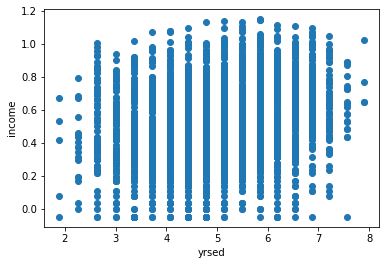

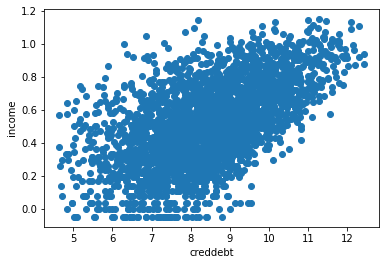

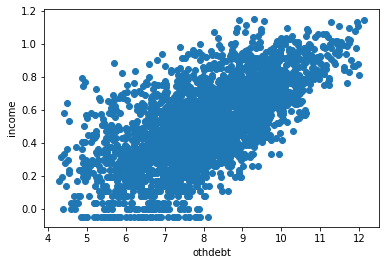

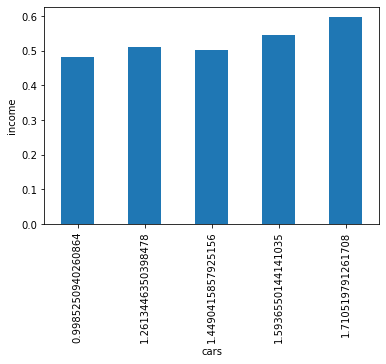

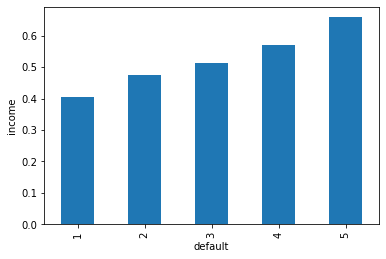

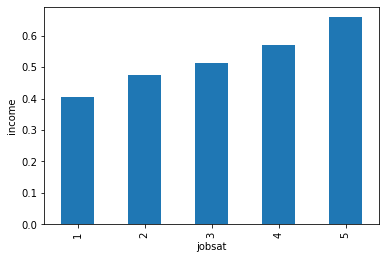

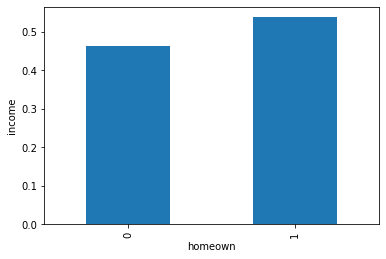

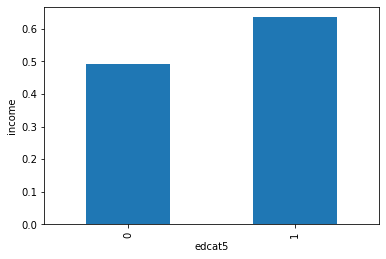

In [31]:
 plt.scatter(trainData_2['yrsed'],trainData_2['income'])
plt.xlabel('yrsed')
plt.ylabel('income')
       # plt.title(feature)
plt.show()


 plt.scatter(trainData_2['creddebt'],trainData_2['income'])
plt.xlabel('creddebt')
plt.ylabel('income')
       # plt.title(feature)
plt.show()



 plt.scatter(trainData_2['othdebt'],trainData_2['income'])
plt.xlabel('othdebt')
plt.ylabel('income')
       # plt.title(feature)
plt.show()


trainData_2.groupby('cars')['income'].median().plot.bar()
plt.xlabel('cars')
plt.ylabel('income')
       # plt.title(feature)
plt.show()


trainData_2.groupby('jobsat')['income'].median().plot.bar()
plt.xlabel('default')
plt.ylabel('income')
       # plt.title(feature)
plt.show()




trainData_2.groupby('jobsat')['income'].median().plot.bar()
plt.xlabel('jobsat')
plt.ylabel('income')
       # plt.title(feature)
plt.show()



trainData_2.groupby('homeown')['income'].median().plot.bar()
plt.xlabel('homeown')
plt.ylabel('income')
       # plt.title(feature)
plt.show()

trainData_2.groupby('edcat5')['income'].median().plot.bar()
plt.xlabel('edcat5')
plt.ylabel('income')
       # plt.title(feature)
plt.show()